# **LAB: weight matrix**

Dong Gyun Ko <br/>
last Updated: july 21, 2022

In [55]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pylab as plt

## **1. data**

In [56]:
url1 = 'https://raw.githubusercontent.com/QuantEcon/lecture-python/master/source/_static/lecture_specific/pandas_panel/realwage.csv'

In [57]:
# display 6 columns for viewing purposes
pd.set_option('display.max_columns', 6)

# reduce decimal points to 2
pd.options.display.float_format = '{:,.2f}'.format

# read url1
df_url = pd.read_csv(url1)

# condition
cond1 = (df_url['Country'] == 'United States')
cond2 = (df_url['Country'] == 'United Kingdom')
cond3 = (df_url['Country'] == 'Ireland')
cond4 = (df_url['Country'] == 'Japan')
cond5 = (df_url['Country'] == 'Spain')
cond6 = (df_url['Country'] == 'New Zealand')
cond7 = (df_url['Country'] == 'Luxembourg')
cond8 = (df_url['Country'] == 'Portugal')
cond9 = (df_url['Country'] == 'France')
cond10 = (df_url['Country'] == 'Korea')

df_url = df_url.loc[cond1|cond2|cond3|cond4|cond5|cond6|cond7|cond8|cond9|cond10]

# pivot_table
df_url = df_url.pivot_table(values='value',
                            index='Time',
                            columns=['Country', 'Series', 'Pay period'])

# to_datetime
df_url.index = pd.to_datetime(df_url.index)

# xs
df_url_f = df_url.xs(('Hourly', 'In 2015 constant prices at 2015 USD exchange rates'), 
                     level=('Pay period', 'Series'), axis=1)

# stack
df = pd.DataFrame(df_url_f.stack(level='Country')).rename(columns={0:'value'})

# reset the index
df.reset_index(inplace=True)

# generate sum & ratio
df['sum'] = df.groupby(['Time'])['value'].transform('sum')
df['ratio'] = df['value']/df['sum']

In [58]:
# sample data

df

,Time,Country,value,sum,ratio
0,2006-01-01,France,10.12,70.94,0.14
1,2006-01-01,Ireland,9.18,70.94,0.13
2,2006-01-01,Japan,5.69,70.94,0.08
3,2006-01-01,Korea,3.42,70.94,0.05
4,2006-01-01,Luxembourg,11.46,70.94,0.16
...,...,...,...,...,...
105,2016-01-01,New Zealand,10.48,80.33,0.13
106,2016-01-01,Portugal,3.36,80.33,0.04
107,2016-01-01,Spain,4.19,80.33,0.05
108,2016-01-01,United Kingdom,10.26,80.33,0.13


## **2. weight matrix**

In [59]:
# weight_matrix(init_t, num_t, num_n)

def weight_matrix(t0, T, N):

    for i in range(0,T):

        globals()['df_{}'.format(i+t0)] = df.loc[N*i:N*i+(N-1)]

    for j in range(t0,t0+T):

        # row_0 = np.array(globals()['df_{}'.format(j)]['ratio'].iloc[0:len(globals()['df_{}'.format(j)])]).reshape(1,-1)

        for k in range(0,len(globals()['df_{}'.format(j)])):

            globals()['row_{}'.format(k+1)] = np.array(globals()['df_{}'.format(j)]['value'].iloc[0:len(globals()['df_{}'.format(j)])]).reshape(1,-1)
            # globals()['row_{}'.format(k+1)] = np.roll(row_0, k)

        globals()['weight_matrix_value{}'.format(j)] = np.asmatrix(np.vstack([globals()['row_{}'.format(k+1)] for k in range (0,len(globals()['df_{}'.format(j)]))]))
    
    zero_vec = np.hstack([0] for v in range(0,N))

    for j in range(t0,t0+T):

        np.fill_diagonal(globals()['weight_matrix_value{}'.format(j)], val = zero_vec)

        globals()['weight_matrix_ratio{}'.format(j)] = globals()['weight_matrix_value{}'.format(j)] / globals()['weight_matrix_value{}'.format(j)].sum(axis=1)

    for j in range(t0,t0+T):

        print('{} year weight matrix'.format(j))
        print(globals()['weight_matrix_ratio{}'.format(j)])

In [60]:
weight_matrix(2006, 11, 10)

2006 year weight matrix
[[0.         0.15091176 0.09357581 0.05618495 0.18836838 0.13871121
  0.04580956 0.06563954 0.16123781 0.09956097]
 [0.16384922 0.         0.09215001 0.05532887 0.18549824 0.13659769
  0.04511156 0.0646394  0.15878105 0.09804398]
 [0.15509234 0.14066979 0.         0.05237183 0.17558434 0.12929726
  0.04270059 0.06118477 0.15029504 0.09280404]
 [0.14986893 0.13593212 0.08428739 0.         0.16967076 0.12494261
  0.04126246 0.0591241  0.14523319 0.08967846]
 [0.17012441 0.15430398 0.09567922 0.05744788 0.         0.14182918
  0.04683927 0.067115   0.16486213 0.10179892]
 [0.161904   0.14684801 0.091056   0.054672   0.183296   0.
  0.044576   0.063872   0.156896   0.09688   ]
 [0.14848129 0.13467352 0.08350697 0.0501394  0.16809978 0.12378576
  0.         0.05857667 0.14388848 0.08884813]
 [0.15115619 0.13709967 0.08501135 0.05104266 0.17112811 0.12601577
  0.04161687 0.         0.14648064 0.09044873]
 [0.16553247 0.15013906 0.09309668 0.05589727 0.18740389 0.13800

C:\Users\geodo\AppData\Local\Temp\ipykernel_50016\769872813.py:20: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  zero_vec = np.hstack([0] for v in range(0,N))


## **3. heatmap**

In [61]:
# heat_map(init_t, num_t)

def heat_map(t0, T):

    for j in range(t0,t0+T):

        plt.rcParams['figure.figsize'] = (8, 8) # figure size
        plt.matshow(globals()['weight_matrix_ratio{}'.format(j)], cmap='viridis') # sequential colormaps
        plt.title('heatmap of {} year weight matrix'.format(j), fontsize=15)
        plt.colorbar(label='percentages along axis 1 (row)') # colorbar legend

        plt.show()

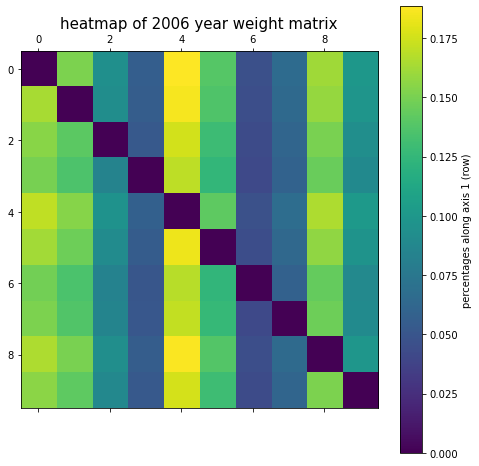

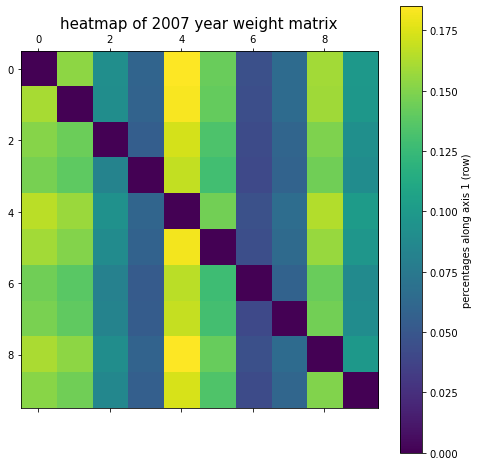

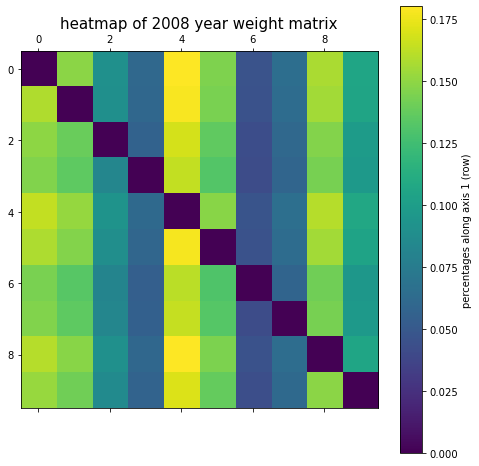

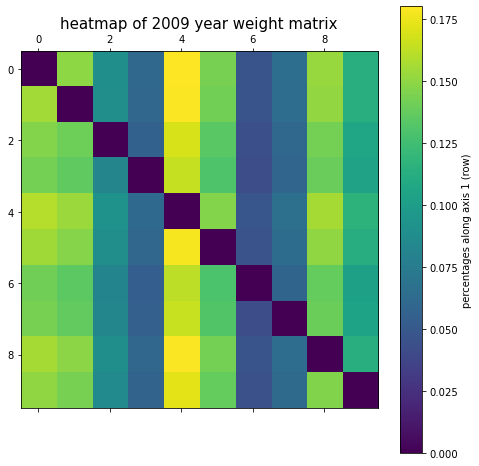

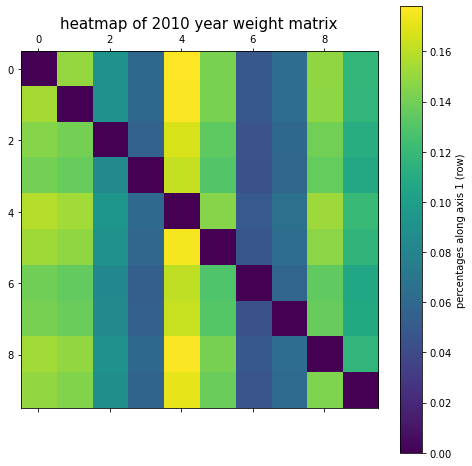

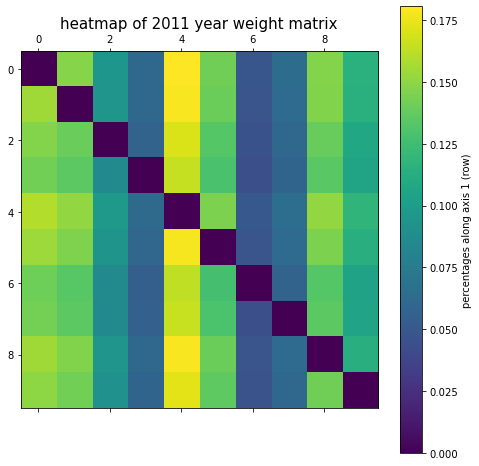

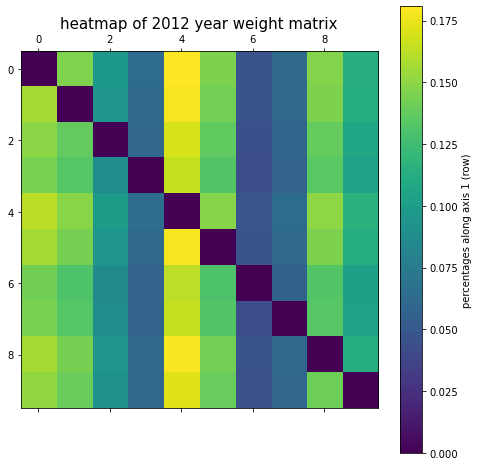

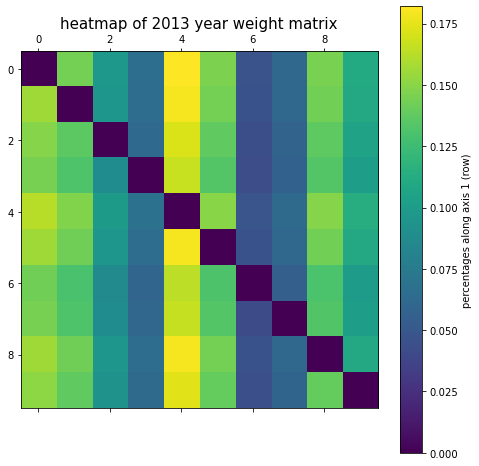

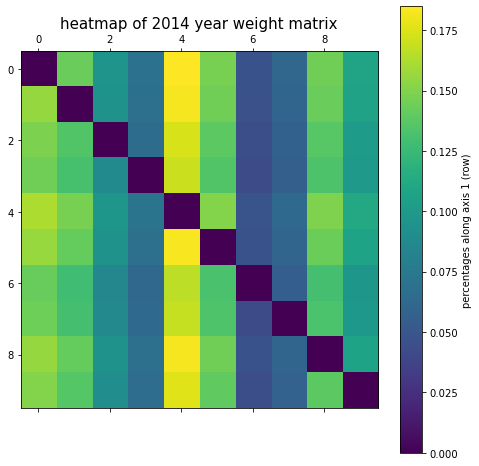

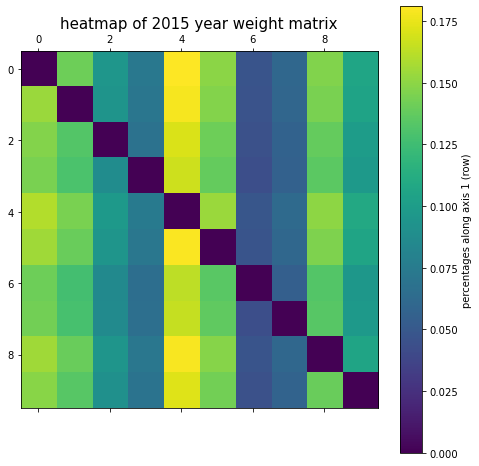

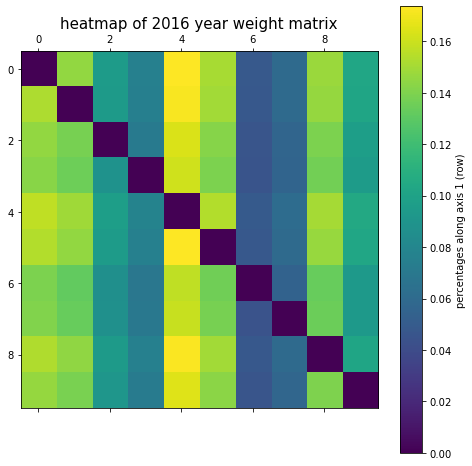

In [62]:
heat_map(2006, 11)